## Timing Comparison for Training Loops

In [1]:
import wandb
import config
import diamond_world_model_trainer as trainer
import incremental_training as incremental_trainer
import os
import shutil
import time
import gc
import torch

run = wandb.init(project='timing-comparison', reinit=True)

Imports successful.
Visualization helpers defined.
Training and validation epoch functions adapted for Batch object and Denoiser.forward.


wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irvin-hwang (irvin-hwang-simulacra-systems) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


### Run `_main_training` on non-incremental dataset

--- Main Training Execution --- 
--- Configuration ---
Using device: cuda
Configuration loaded for _main_training.
--- Initializing Models for _main_training ---
Denoiser model created for _main_training. Total parameter count: 330,464,131
DiffusionSampler created for visualization in _main_training.
--- Setting up Optimizer and Scheduler for _main_training ---
Optimizer: AdamW with LR=0.0001
LR Scheduler: LambdaLR with 100 warmup steps.
Wandb watching denoiser model.
No checkpoint found or specified for _main_training. Starting fresh.
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Full dataset size: 591
Creating new train/val split...
Saved new dataset split to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\dataset_split.pth
Training dataset size: 531, Validation dataset size: 60
Preparing filtered validation subsets for visualization...
Filtering dataset with 60 samples for actions: 

Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 30 samples.
Filtering dataset with 60 samples for actions: [0.13]


Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 30 samples.
Found 30 stopped and 30 moving samples.
--- Starting Training Process in _main_training ---


Epoch 1 [Train]:   0%|          | 0/265 [00:00<?, ?it/s]

Epoch 1 [Valid]:   0%|          | 0/30 [00:15<?, ?it/s]

About to enter validation loop
Sending batch 0 to denoiser
Sending batch 1 to denoiser
Sending batch 2 to denoiser
Sending batch 3 to denoiser
Sending batch 4 to denoiser
Sending batch 5 to denoiser
Sending batch 6 to denoiser
Sending batch 7 to denoiser
Sending batch 8 to denoiser
Sending batch 9 to denoiser
Sending batch 10 to denoiser
Sending batch 11 to denoiser
Sending batch 12 to denoiser
Sending batch 13 to denoiser
Sending batch 14 to denoiser
Sending batch 15 to denoiser
Sending batch 16 to denoiser
Sending batch 17 to denoiser
Sending batch 18 to denoiser
Sending batch 19 to denoiser
Sending batch 20 to denoiser
Sending batch 21 to denoiser
Sending batch 22 to denoiser
Sending batch 23 to denoiser
Sending batch 24 to denoiser
Sending batch 25 to denoiser
Sending batch 26 to denoiser
Sending batch 27 to denoiser
Sending batch 28 to denoiser
Sending batch 29 to denoiser
Validation for epoch 1 took 32.66s
Epoch 1/1 - Train Loss: 0.7539 (MA: 0.7539), Val Loss: 0.8077 (MA: 0.8077)

avg_train_loss,▁
avg_val_loss,▁
batch_idx,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇█
epoch,▁
epoch_duration_sec,▁
learning_rate,▁
nonincremental_fw_bw_duration,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
nonincremental_opt_sched_duration,▆▃▅▄▄▃▂▅▃▃▃▇▆▅▅▅▅▆█▁█▅▄▆▅▄█
nonincremental_step_data_fetch_sec,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
nonincremental_step_duration_sec,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sampling_duration_sec,▁


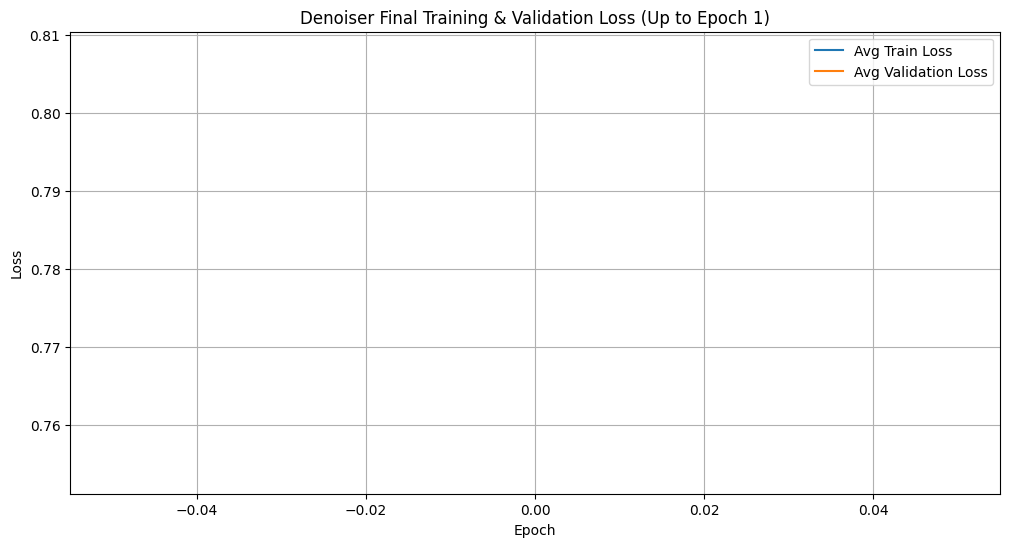

In [2]:
gc.collect()
torch.cuda.empty_cache()

config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_nonincremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_nonincremental_test')
config.IMAGE_DIR = os.path.join(config.DATA_DIR, 'images')
config.CSV_PATH = os.path.join(config.DATA_DIR, 'laundry_data_incremental_test.csv')
config.NUM_EPOCHS = 1

if os.path.exists(config.OUTPUT_DIR):
    shutil.rmtree(config.OUTPUT_DIR)
os.makedirs(config.OUTPUT_DIR, exist_ok=True)

start = time.time()
trainer_run = trainer._main_training(finish_run=False)
noninc_duration = time.time() - start
wandb.finish()

### Run `train_diamond_model` on incremental dataset

In [ ]:
gc.collect()
torch.cuda.empty_cache()

config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_incremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_incremental_test')
config.IMAGE_DIR = os.path.join(config.DATA_DIR, 'images')
config.CSV_PATH = os.path.join(config.DATA_DIR, 'laundry_data_incremental_test.csv')
config.EARLY_STOPPING_PATIENCE = 1

if os.path.exists(config.OUTPUT_DIR):
    shutil.rmtree(config.OUTPUT_DIR)
os.makedirs(config.OUTPUT_DIR, exist_ok=True)

wandb.init(project='timing-comparison', reinit=True)
start = time.time()
incremental_trainer.main()
inc_duration = time.time() - start
wandb.finish()

Found 1 new sessions to collect.


Wrote 4538 entries to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\jetbot_new_data_incremental_test\new.csv
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Fresh dataset size is 299.
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Full dataset size: 292
Creating new train/val split...
Saved new dataset split to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_incremental_test\dataset_split.pth
Starting training
Using device: cuda
Loaded from checkpoint C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\checkpoints\denoiser_model_best_val_loss.pth
Incremental training for at least 320 and at most 320 with 320 number of steps per fresh data epoch


Incremental Training Steps:   0%|          | 0/320 [00:00<?, ?it/s]

Filtering dataset with 30 samples for actions: [0.0]


Filtering Dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Filtered down to 14 samples.
Filtering dataset with 30 samples for actions: [0.13]


Filtering Dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Filtered down to 16 samples.
About to validate


Epoch 320 [Valid]:   0%|          | 0/15 [00:15<?, ?it/s]

About to enter validation loop
Sending batch 0 to denoiser
Sending batch 1 to denoiser
Sending batch 2 to denoiser
Sending batch 3 to denoiser
Sending batch 4 to denoiser
Sending batch 5 to denoiser
Sending batch 6 to denoiser
Sending batch 7 to denoiser
Sending batch 8 to denoiser
Sending batch 9 to denoiser
Sending batch 10 to denoiser
Sending batch 11 to denoiser
Sending batch 12 to denoiser
Sending batch 13 to denoiser
Sending batch 14 to denoiser
Validation at step 320 took 36.55s
Sampling at step 320 took 29.37s
✅ Restoring model to best validation loss: 0.7876
Training Complete
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']


Evaluating:   0%|          | 0/250 [00:00<?, ?it/s]

C:\Projects\pythonenv-deeprl\Lib\site-packages\torchmetrics\utilities\prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(


### Compare timings

In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    'run': ['non_incremental', 'incremental'],
    'duration_sec': [noninc_duration, inc_duration]
})
comparison_df